In [2]:
#QUESTION:
#Black Friday Dataset
#black-fridayThis dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and
#expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression
#problem. The dataset has 550,069 rows and 12 columns.

#Problem: Predict purchase amount.

# Step 0: Loading the Libraries and Dataset

# Import libraries

In [1]:
# Import libraries and dataset
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# Importing dataset

In [2]:
# Importing dataset
train = pd.read_csv(r'F:\black_friday_sales\train.csv')
test = pd.read_csv(r'F:\black_friday_sales\test.csv')

In [3]:
df1=pd.DataFrame(train)
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df2=pd.DataFrame(test)
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


# Step 1: Descriptive analysis


In [5]:
# Preview training dataset
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Preview testing dataset
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
# Training dataset dimensions - (rows, columns)
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [8]:
# Testing dataset dimensions - (rows, columns)
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [9]:
# Features data-type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
# Statistical summary
train.describe().T       #T means Transpose...row become column and column become row...

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


# Find the unique values and Checking the counts of unique values.

In [11]:
#Find the unique values
train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [12]:
# Checking the counts of unique values.....for each of the feacture above...like Age has 7 unique values....so further we get into
#Age and will count the unique values in it...in percenatge form.

#AGE:

round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [13]:
#GENDER:
round((train['Gender'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

M    75.31 %
F    24.69 %
Name: Gender, dtype: object

In [14]:
#OCCUPATION:
round((train['Occupation'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

4     13.15 %
0     12.66 %
7     10.75 %
1      8.62 %
17     7.28 %
20      6.1 %
12     5.67 %
14     4.96 %
2      4.83 %
16     4.61 %
6       3.7 %
3      3.21 %
10     2.35 %
5      2.21 %
15     2.21 %
11     2.11 %
19     1.54 %
13      1.4 %
18      1.2 %
9      1.14 %
8      0.28 %
Name: Occupation, dtype: object

In [15]:
#CITY_CATEGORY:
round((train['City_Category'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

B    42.03 %
C    31.12 %
A    26.85 %
Name: City_Category, dtype: object

In [16]:
#STAY_IN_CURRENT_CITY_YEARS:
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

In [17]:
#MARITAL_STATUS:
round((train['Marital_Status'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

0    59.03 %
1    40.97 %
Name: Marital_Status, dtype: object

In [18]:
#PRODUCT_CATEGORY_1:
round((train['Product_Category_1'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

5     27.44 %
1     25.52 %
8     20.71 %
11     4.42 %
2      4.34 %
6      3.72 %
3      3.67 %
4      2.14 %
16     1.79 %
15     1.14 %
13     1.01 %
10     0.93 %
12     0.72 %
7      0.68 %
18     0.57 %
20     0.46 %
19     0.29 %
14     0.28 %
17     0.11 %
9      0.07 %
Name: Product_Category_1, dtype: object

In [19]:
#PRODUCT_CATEGORY_2:
round((train['Product_Category_2'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

8.0     17.03 %
14.0    14.64 %
2.0     13.07 %
16.0    11.49 %
15.0    10.06 %
5.0      6.97 %
4.0      6.82 %
6.0      4.37 %
11.0     3.75 %
17.0     3.54 %
13.0      2.8 %
9.0      1.51 %
12.0     1.47 %
10.0     0.81 %
3.0      0.77 %
18.0     0.74 %
7.0      0.17 %
Name: Product_Category_2, dtype: object

In [20]:
#PRODUCT_CATEGORY_3:
round((train['Product_Category_3'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

16.0    19.56 %
15.0    16.79 %
14.0    11.05 %
17.0    10.01 %
5.0      9.99 %
8.0      7.53 %
9.0      6.94 %
12.0     5.54 %
13.0     3.27 %
6.0      2.93 %
18.0     2.77 %
4.0      1.12 %
11.0     1.08 %
10.0     1.03 %
3.0      0.37 %
Name: Product_Category_3, dtype: object

In [21]:
#Observations:
#The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.


In [22]:
#Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [23]:
train['Age'] = train['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [24]:
#AGAIN CHECK:   #SO HERE '+' HAS BEEN REMOVED NOW,SO THAT WE COULD NOT GET STRUCK WHILE WORKING WITH DATA NUMERICALLY.
                #FROM 55+    TO   55

#FOR AGE:
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'



26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55        3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [25]:
#AGAIN CHECK:    #SO HERE '+' HAS BEEN REMOVED NOW,SO THAT WE COULD NOT GET STRUCK WHILE WORKING WITH DATA NUMERICALLY.
                 #FROM 4+    TO   4

#FOR #STAY_IN_CURRENT_CITY_YEARS:
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

In [26]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

# Finding the null values

In [27]:
train.isnull().sum()

   #This above will show null values but the numbers of null values in each feature we have.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [28]:
#But as if we want the same but in percentage than we have to convert it into % 
#percentage= (parts/whole)*100%    ....upto two decimal points.

         #EXPLANATION WITH EXAMPLE:  PROD_CAT2=173638 NULL VALUES ARE THERE IN TOTAL....SO BY FORMULA..
         #  (173638/550068)*100%= 31.57%



round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [29]:
# Observations:
#The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' 
#contains 69.67% null values so we can drop this feature.

In [30]:
#As from the above output we can see that...only Product_Category_2 has  173638 null values and Product_Category_3 has 383247.
#So,Now we can fill the null values using fillna() function
#NOTE:for missing values we can fill negative number ,so that in machine learning ,machine also can understand it..
#where is missing values.

In [31]:
#REMOVING NULL VALUES FROM PRODUCT_CATEGORY_2:

train['Product_Category_2']=train['Product_Category_2'].fillna(-2.0).astype("float32")


In [32]:
#REMOVING NULL VALUES FROM PRODUCT_CATEGORY_3:

train['Product_Category_3']=train['Product_Category_3'].fillna(-2.0).astype("float32")

In [33]:
#Again chechking the missing values or null values.
train.isnull().sum()      #NOW WE ARE LEFT WITH NO MISSING VALUES.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Step 2: Exploratory Data Analysis

# 2.1 Univariate Analysis

In [34]:
#distribution of numeric variables(Gender,age)

<AxesSubplot:xlabel='Gender', ylabel='count'>

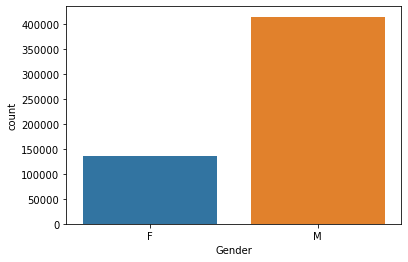

In [35]:
sns.countplot(train['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

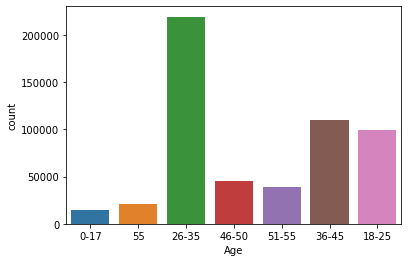

In [36]:
sns.countplot(train['Age'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

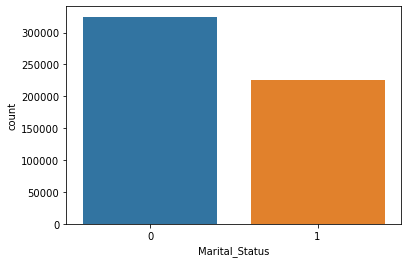

In [37]:
sns.countplot(train['Marital_Status'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

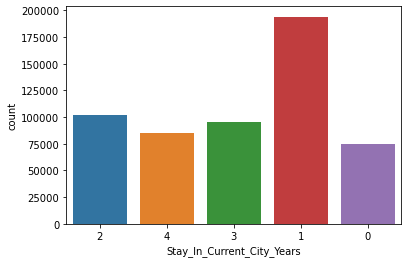

In [38]:
sns.countplot(train["Stay_In_Current_City_Years"])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

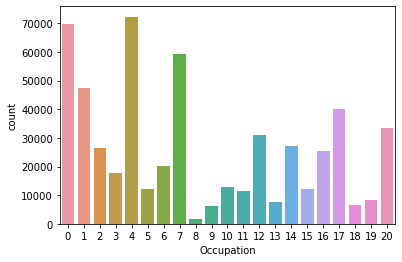

In [39]:
sns.countplot(train['Occupation'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

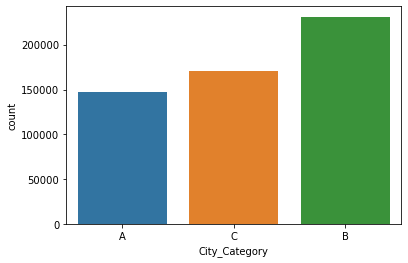

In [40]:
sns.countplot(train['City_Category'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

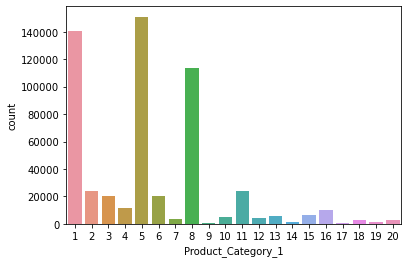

In [41]:
sns.countplot(train['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

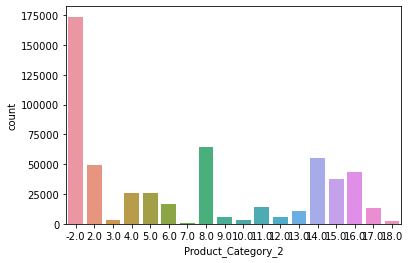

In [42]:
sns.countplot(train['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

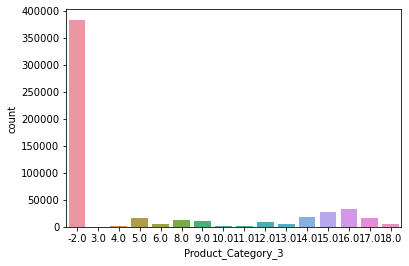

In [43]:
sns.countplot(train['Product_Category_3'])

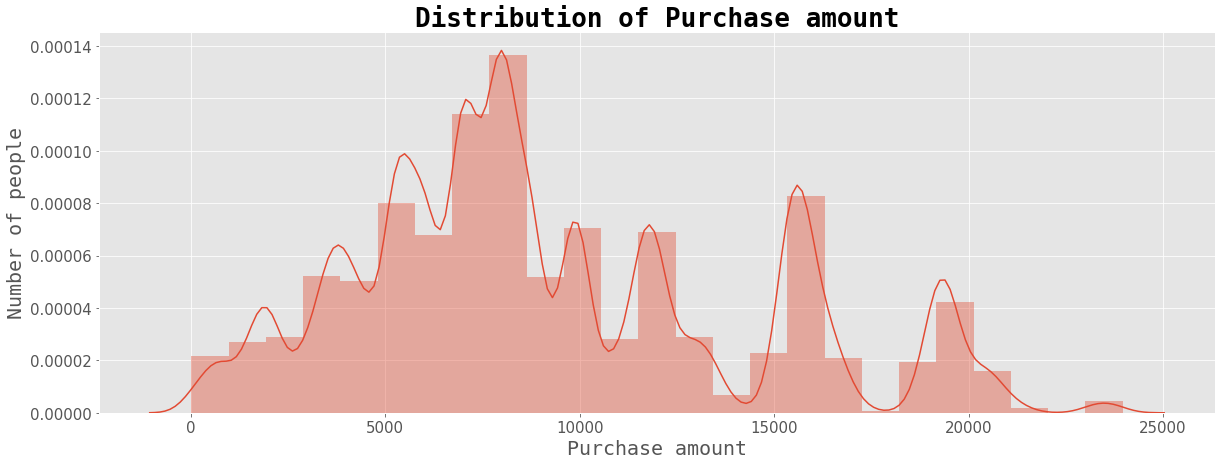

In [44]:
# Creating a distplot for dependent feature 'Purchase'

plt.style.use('ggplot')
plt.figure(figsize = (20, 7))                        #figsize is a tuple of the width and height of the figure in inches.
sns.distplot(train['Purchase'], bins = 25)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 26, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

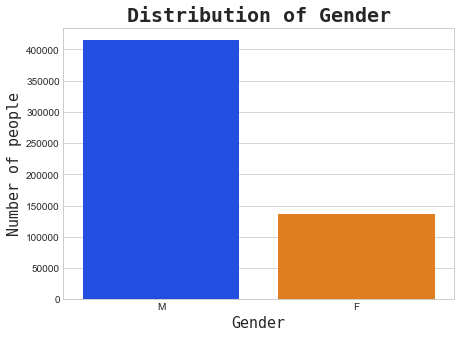

In [45]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()

plt.figure(figsize = (7, 5))                         #figsize is a tuple of the width and height of the figure in inches.
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

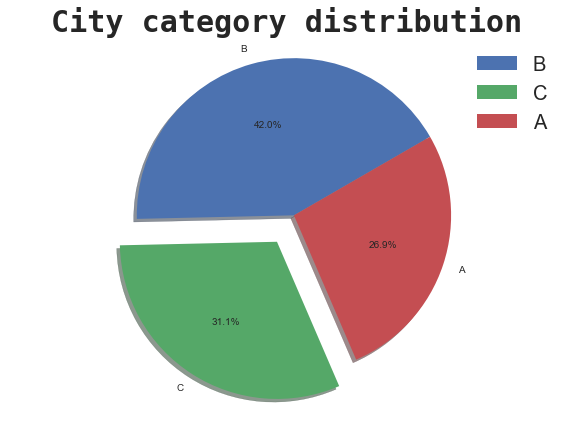

In [46]:
# Creating a pie chart for 'City Category'
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

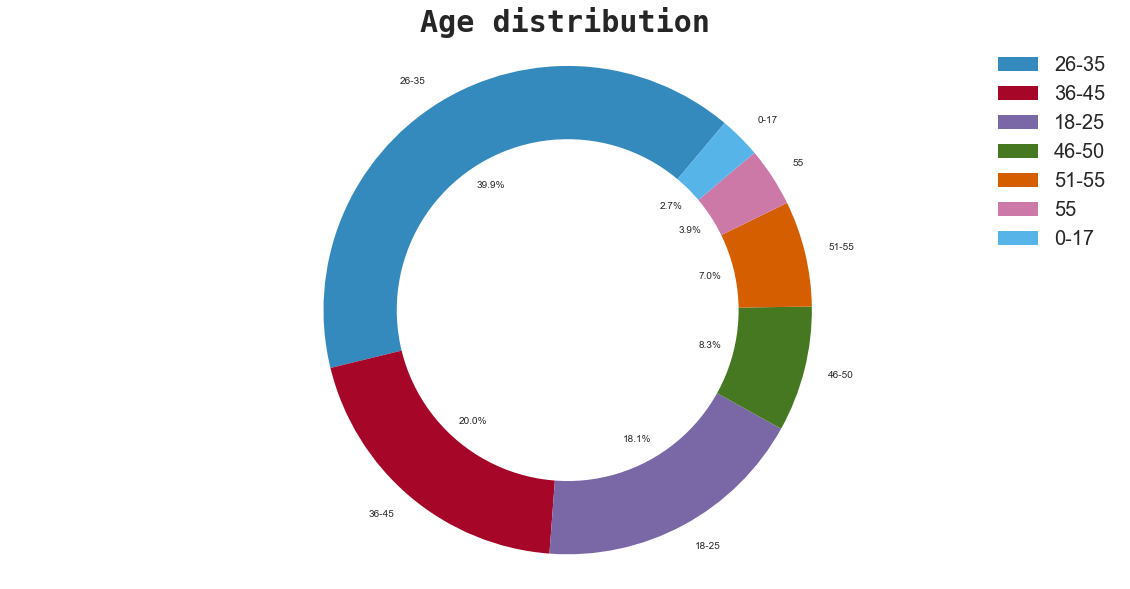

In [47]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()


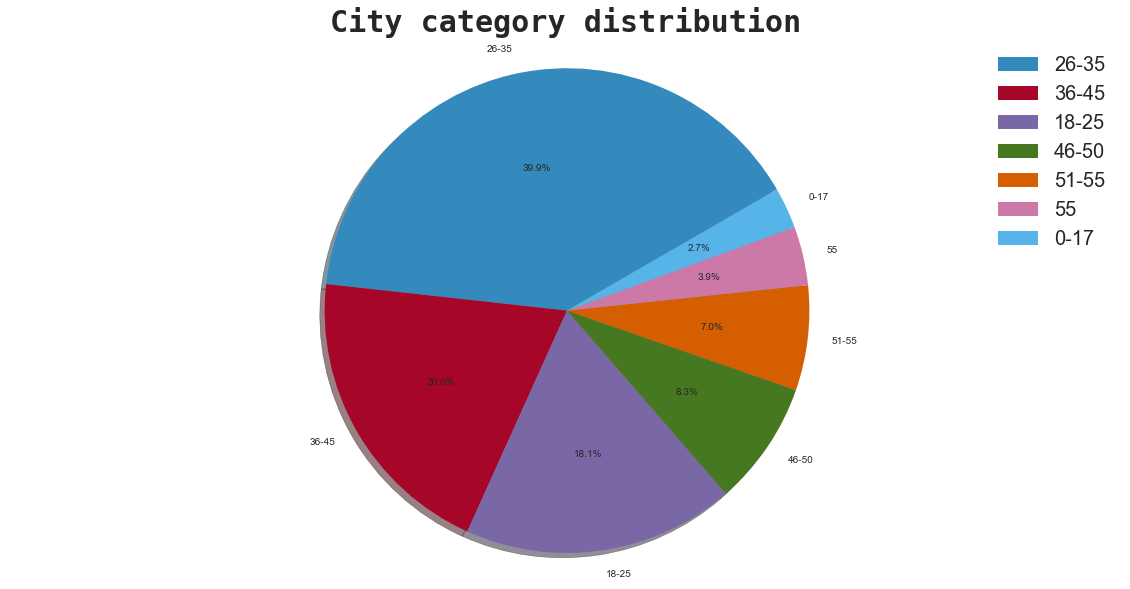

In [48]:
#Create a pie chart for "Age"
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 30, shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

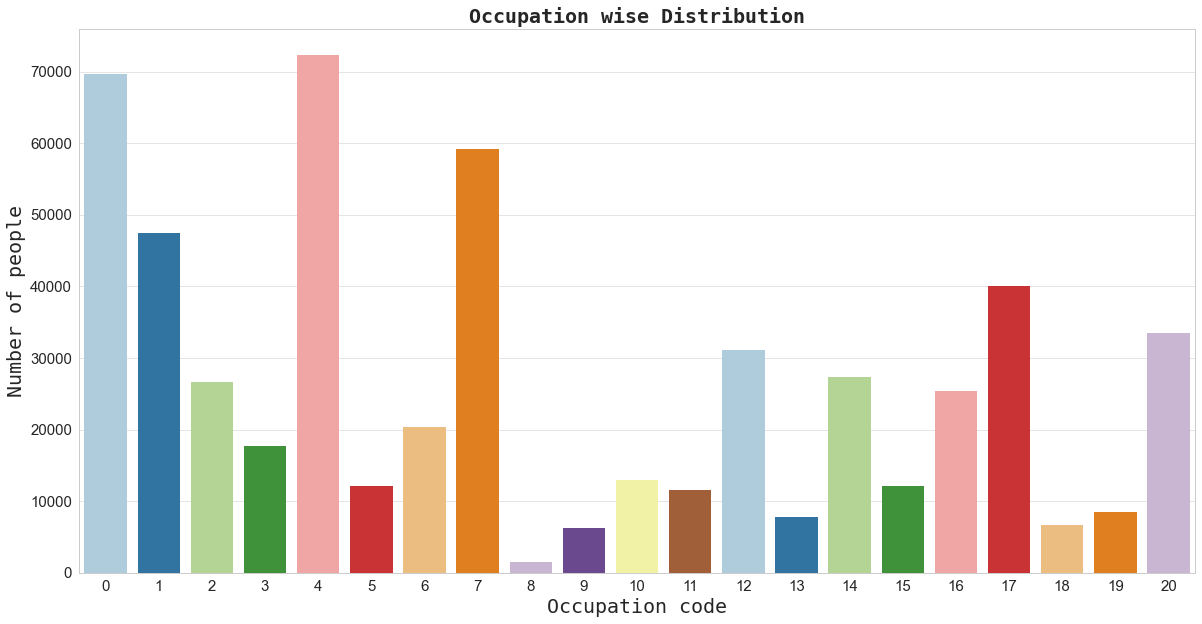

In [49]:
# Creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 10))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

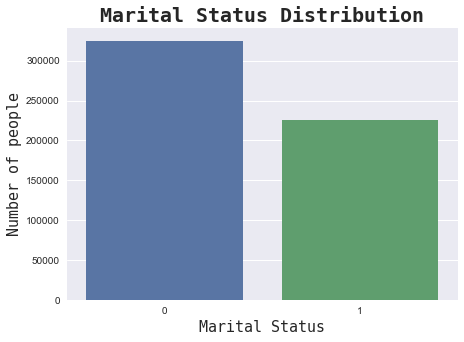

In [50]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

In [51]:
import squarify

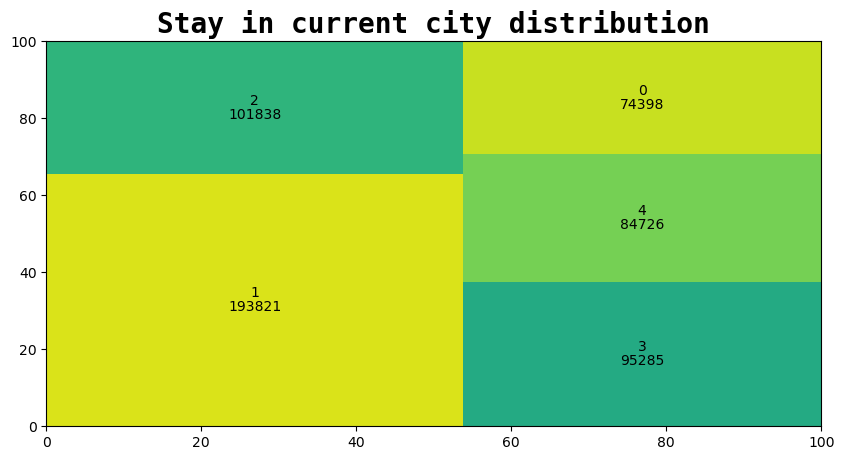

In [52]:
# Creating a Treemap for 'Stay_In_Current_City_Years'
stay = train['Stay_In_Current_City_Years'].value_counts()

import squarify
plt.style.use('default')
plt.figure(figsize = (10, 5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

# 2.2 Bivariate Analysis

In [53]:
#1.ON THE BASIS OF OCCUPATION,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

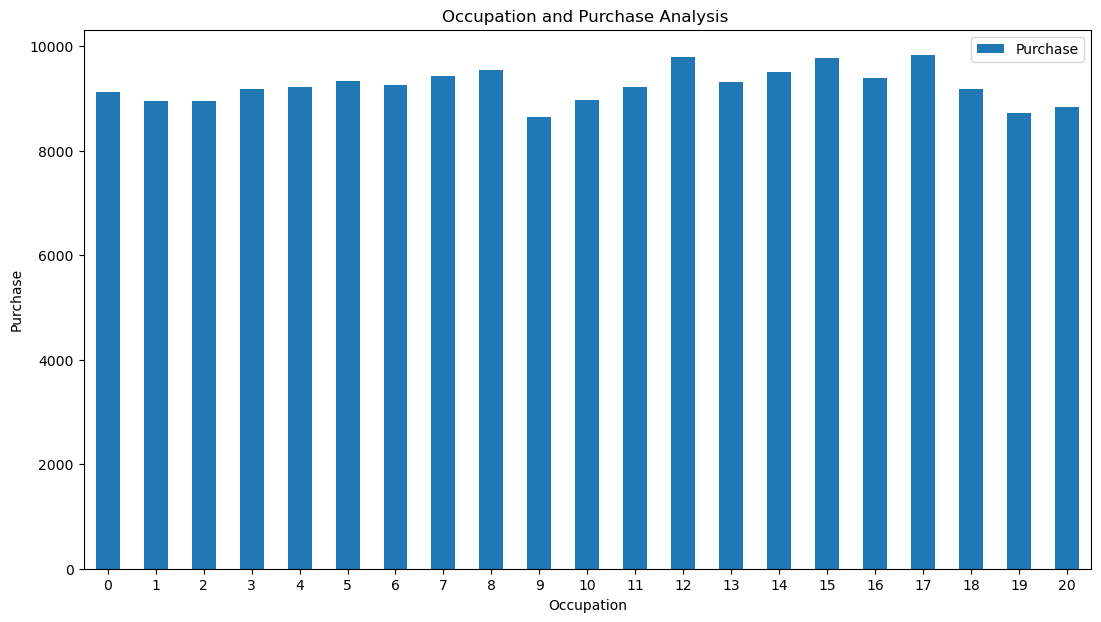

In [54]:
occupation_plot=train.pivot_table(index='Occupation',values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('Occupation and Purchase Analysis ')
plt.show()
    

In [55]:
#same for Age and Gender....and all the remaining variables with different values also,appart from Purchase.

In [56]:
#2.ON THE BASIS OF Age,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

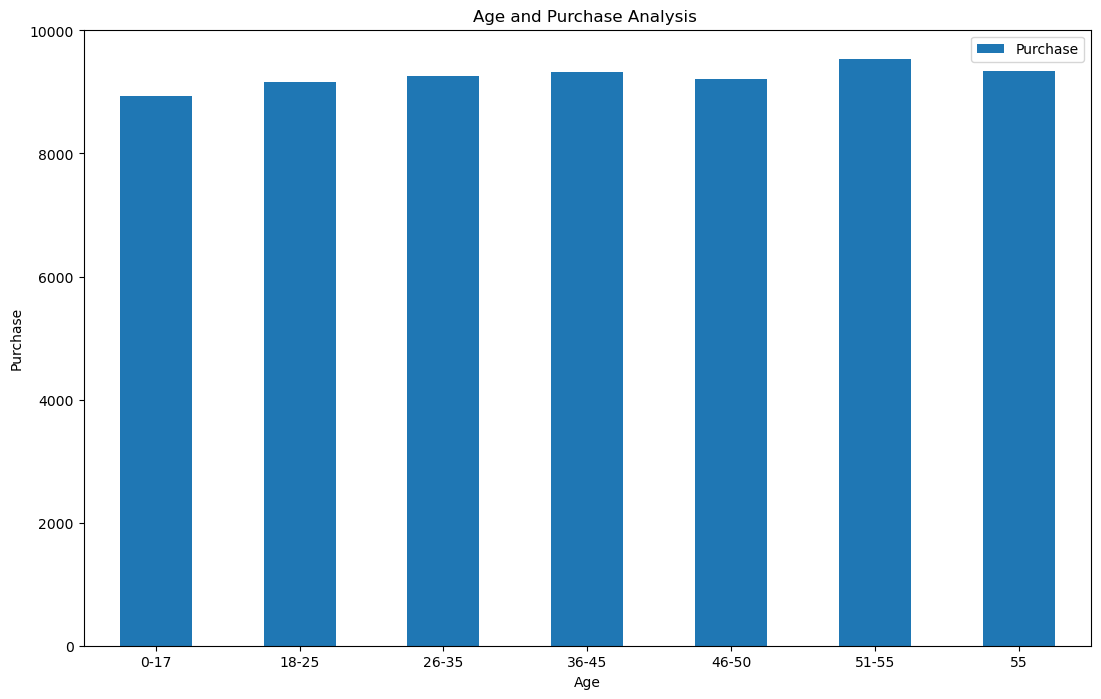

In [57]:
age_plot=train.pivot_table(index='Age',values='Purchase',aggfunc=np.mean)
age_plot.plot(kind='bar',figsize=(13,8))
plt.xlabel('Age')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('Age and Purchase Analysis ')
plt.show()

In [58]:
#3.ON THE BASIS OF Gender,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

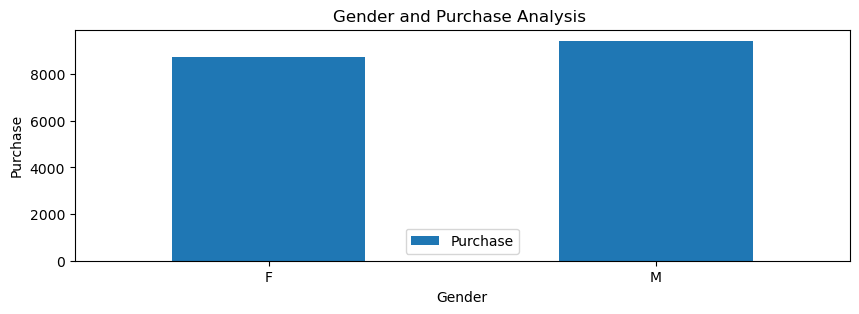

In [59]:
gender_plot=train.pivot_table(index='Gender',values='Purchase',aggfunc=np.mean)
gender_plot.plot(kind='bar',figsize=(10,3))
plt.xlabel('Gender')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('Gender and Purchase Analysis ')
plt.show()

In [60]:
#4.ON THE BASIS OF City_Category ,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

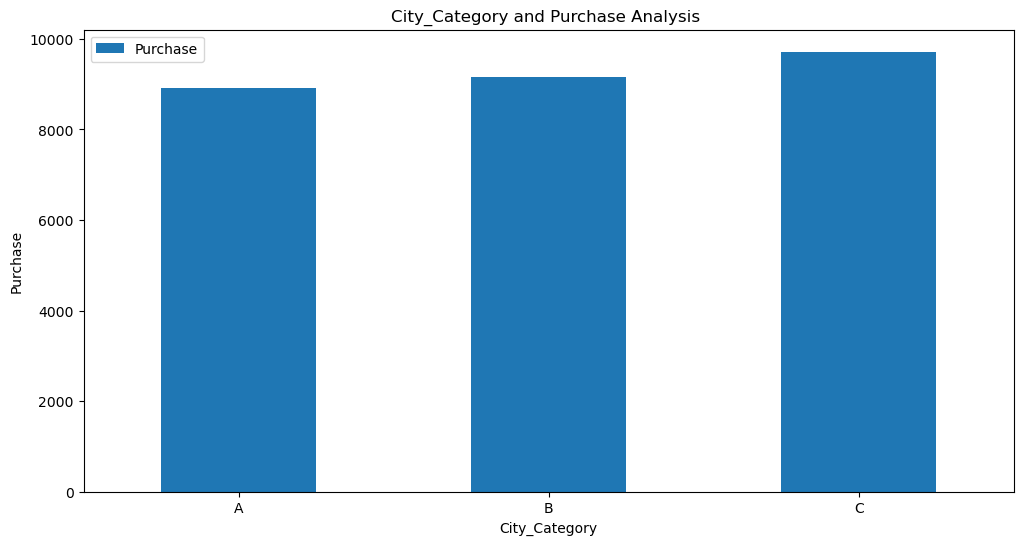

In [61]:
City_Category_plot=train.pivot_table(index='City_Category',values='Purchase',aggfunc=np.mean)
City_Category_plot.plot(kind='bar',figsize=(12,6))
plt.xlabel('City_Category')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('City_Category and Purchase Analysis ')
plt.show()

In [62]:
#5.ON THE BASIS OF Stay_In_Current_City_Years ,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

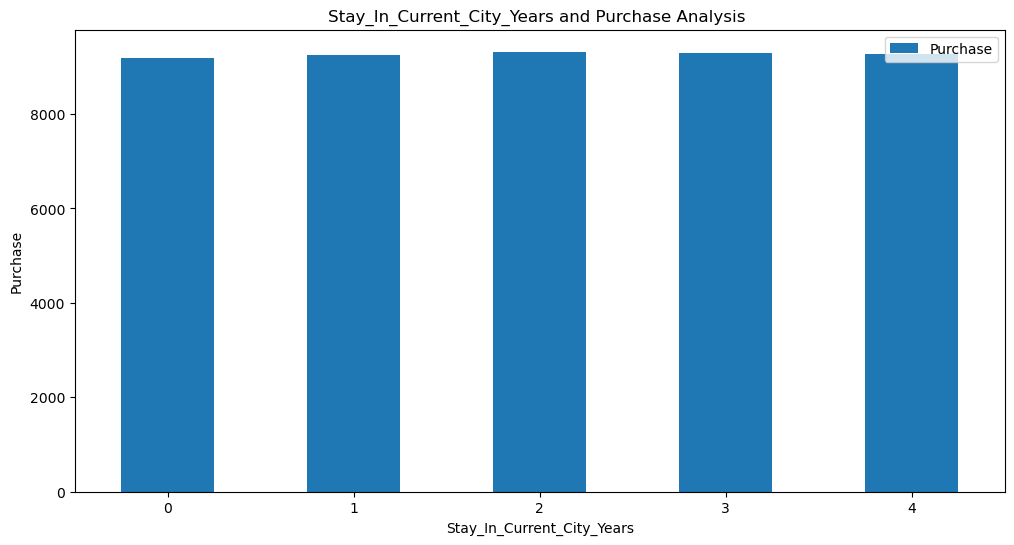

In [63]:
Stay_In_Current_City_Years_plot=train.pivot_table(index='Stay_In_Current_City_Years',values='Purchase',aggfunc=np.mean)
Stay_In_Current_City_Years_plot.plot(kind='bar',figsize=(12,6))
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('Stay_In_Current_City_Years and Purchase Analysis ')
plt.show()

In [64]:
#6.ON THE BASIS OF Marital_Status,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

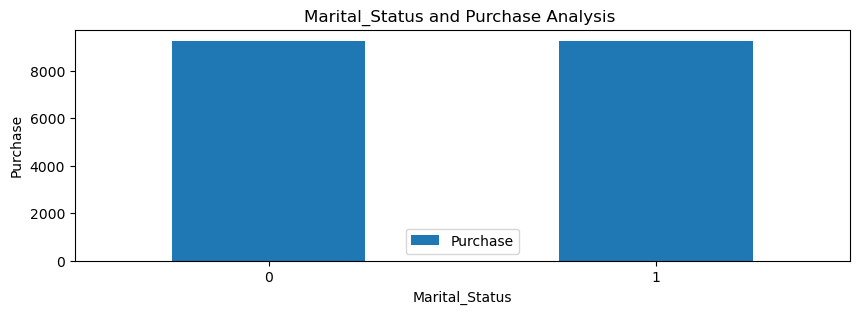

In [65]:
Marital_Status_plot=train.pivot_table(index='Marital_Status',values='Purchase',aggfunc=np.mean)
Marital_Status_plot.plot(kind='bar',figsize=(10,3))
plt.xlabel('Marital_Status')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('Marital_Status and Purchase Analysis ')
plt.show()

In [66]:
#7.ON THE BASIS OF Product_Category_1 ,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

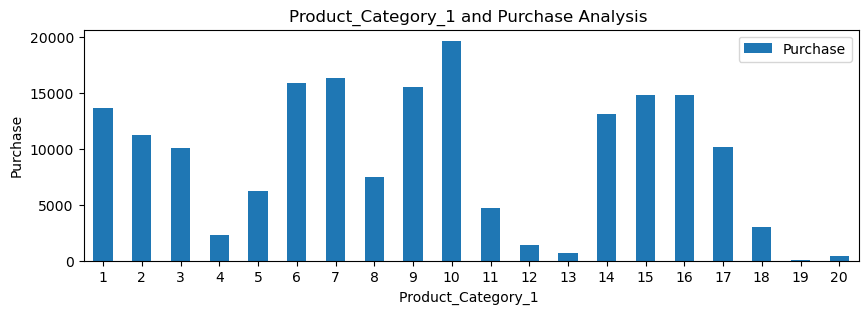

In [67]:
Product_Category_1_plot=train.pivot_table(index='Product_Category_1',values='Purchase',aggfunc=np.mean)
Product_Category_1_plot.plot(kind='bar',figsize=(10,3))
plt.xlabel('Product_Category_1 ')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('Product_Category_1 and Purchase Analysis ')
plt.show()

In [68]:
#8.ON THE BASIS OF Product_Category_2 ,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

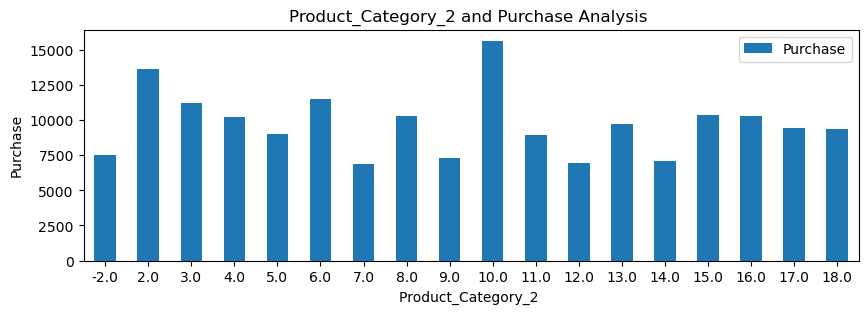

In [69]:
Product_Category_2_plot=train.pivot_table(index='Product_Category_2',values='Purchase',aggfunc=np.mean)
Product_Category_2_plot.plot(kind='bar',figsize=(10,3))
plt.xlabel('Product_Category_2 ')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('Product_Category_2 and Purchase Analysis ')
plt.show()

In [70]:
#9.ON THE BASIS OF Product_Category_3  ,WE WILL ANALYSE THE DATASET W.R.T THE PURCHASE AMOUNT.

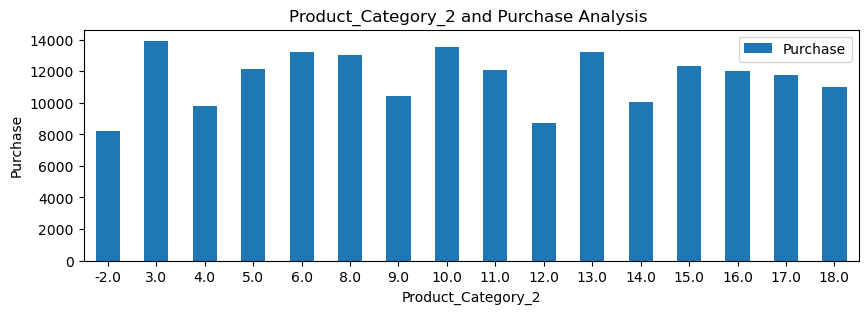

In [71]:
Product_Category_3_plot=train.pivot_table(index='Product_Category_3',values='Purchase',aggfunc=np.mean)
Product_Category_3_plot.plot(kind='bar',figsize=(10,3))
plt.xlabel('Product_Category_2')
plt.ylabel('Purchase')
     #For rotation of label in x axis.
plt.xticks(rotation=0)
plt.title('Product_Category_2 and Purchase Analysis ')
plt.show()

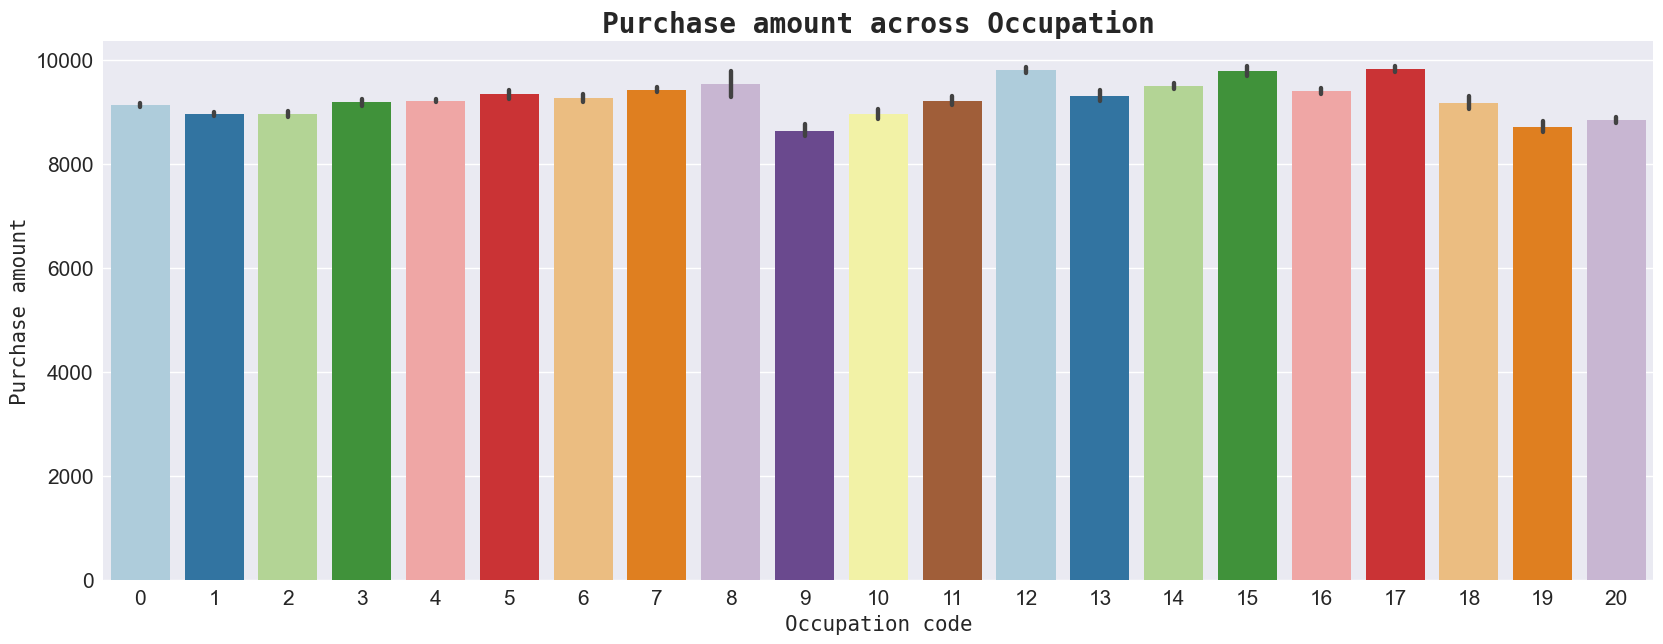

In [72]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(train['Occupation'], train['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

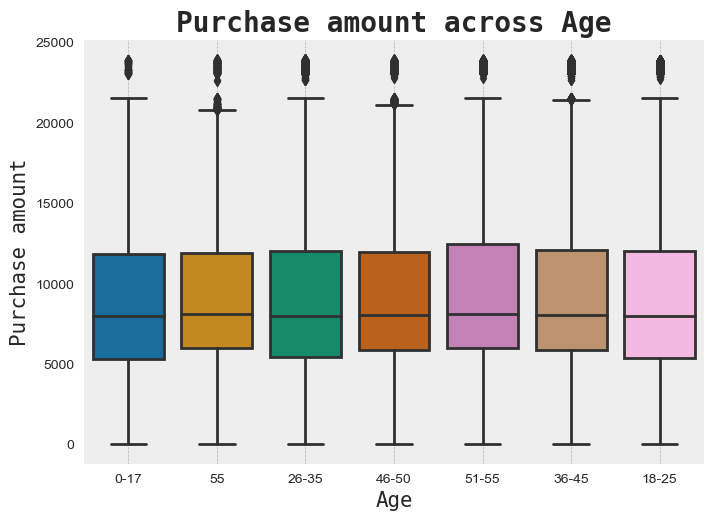

In [73]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(train['Age'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

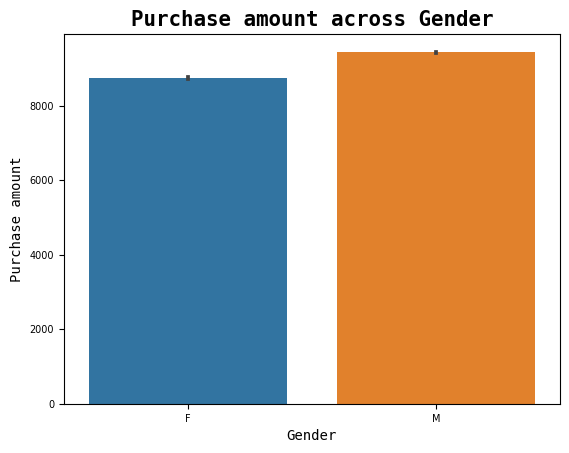

In [74]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('default')
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

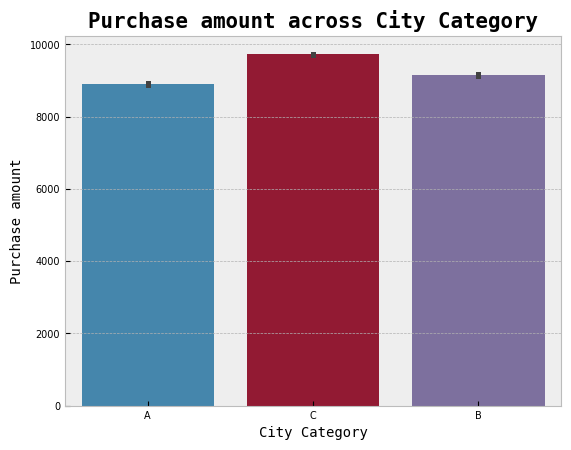

In [75]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

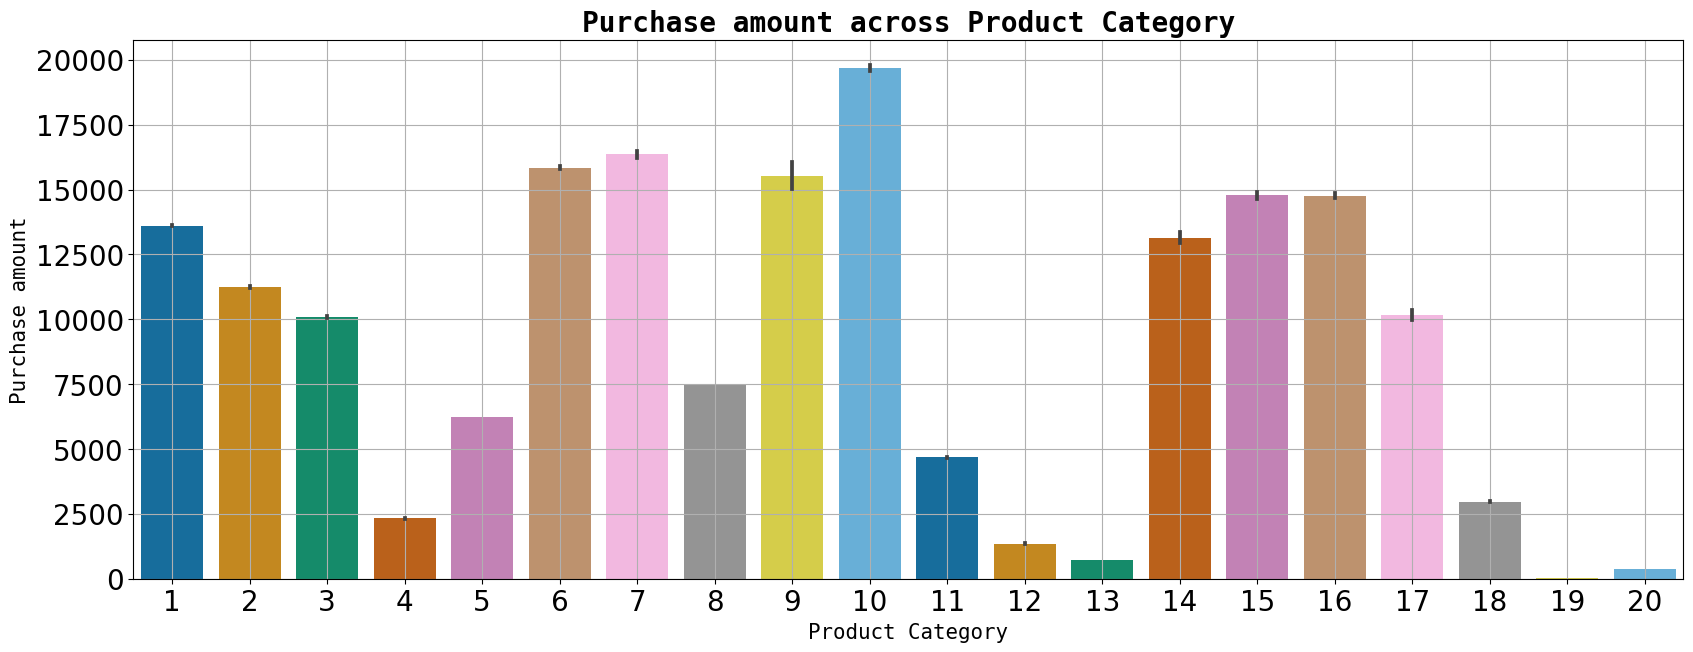

In [76]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(train['Product_Category_1'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

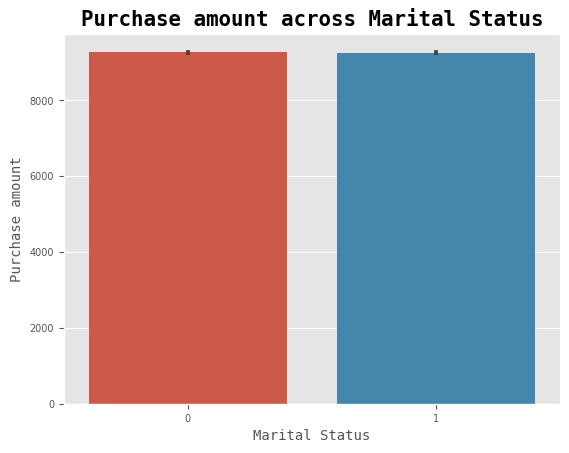

In [77]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

# 2.3 Multivariate Analysis

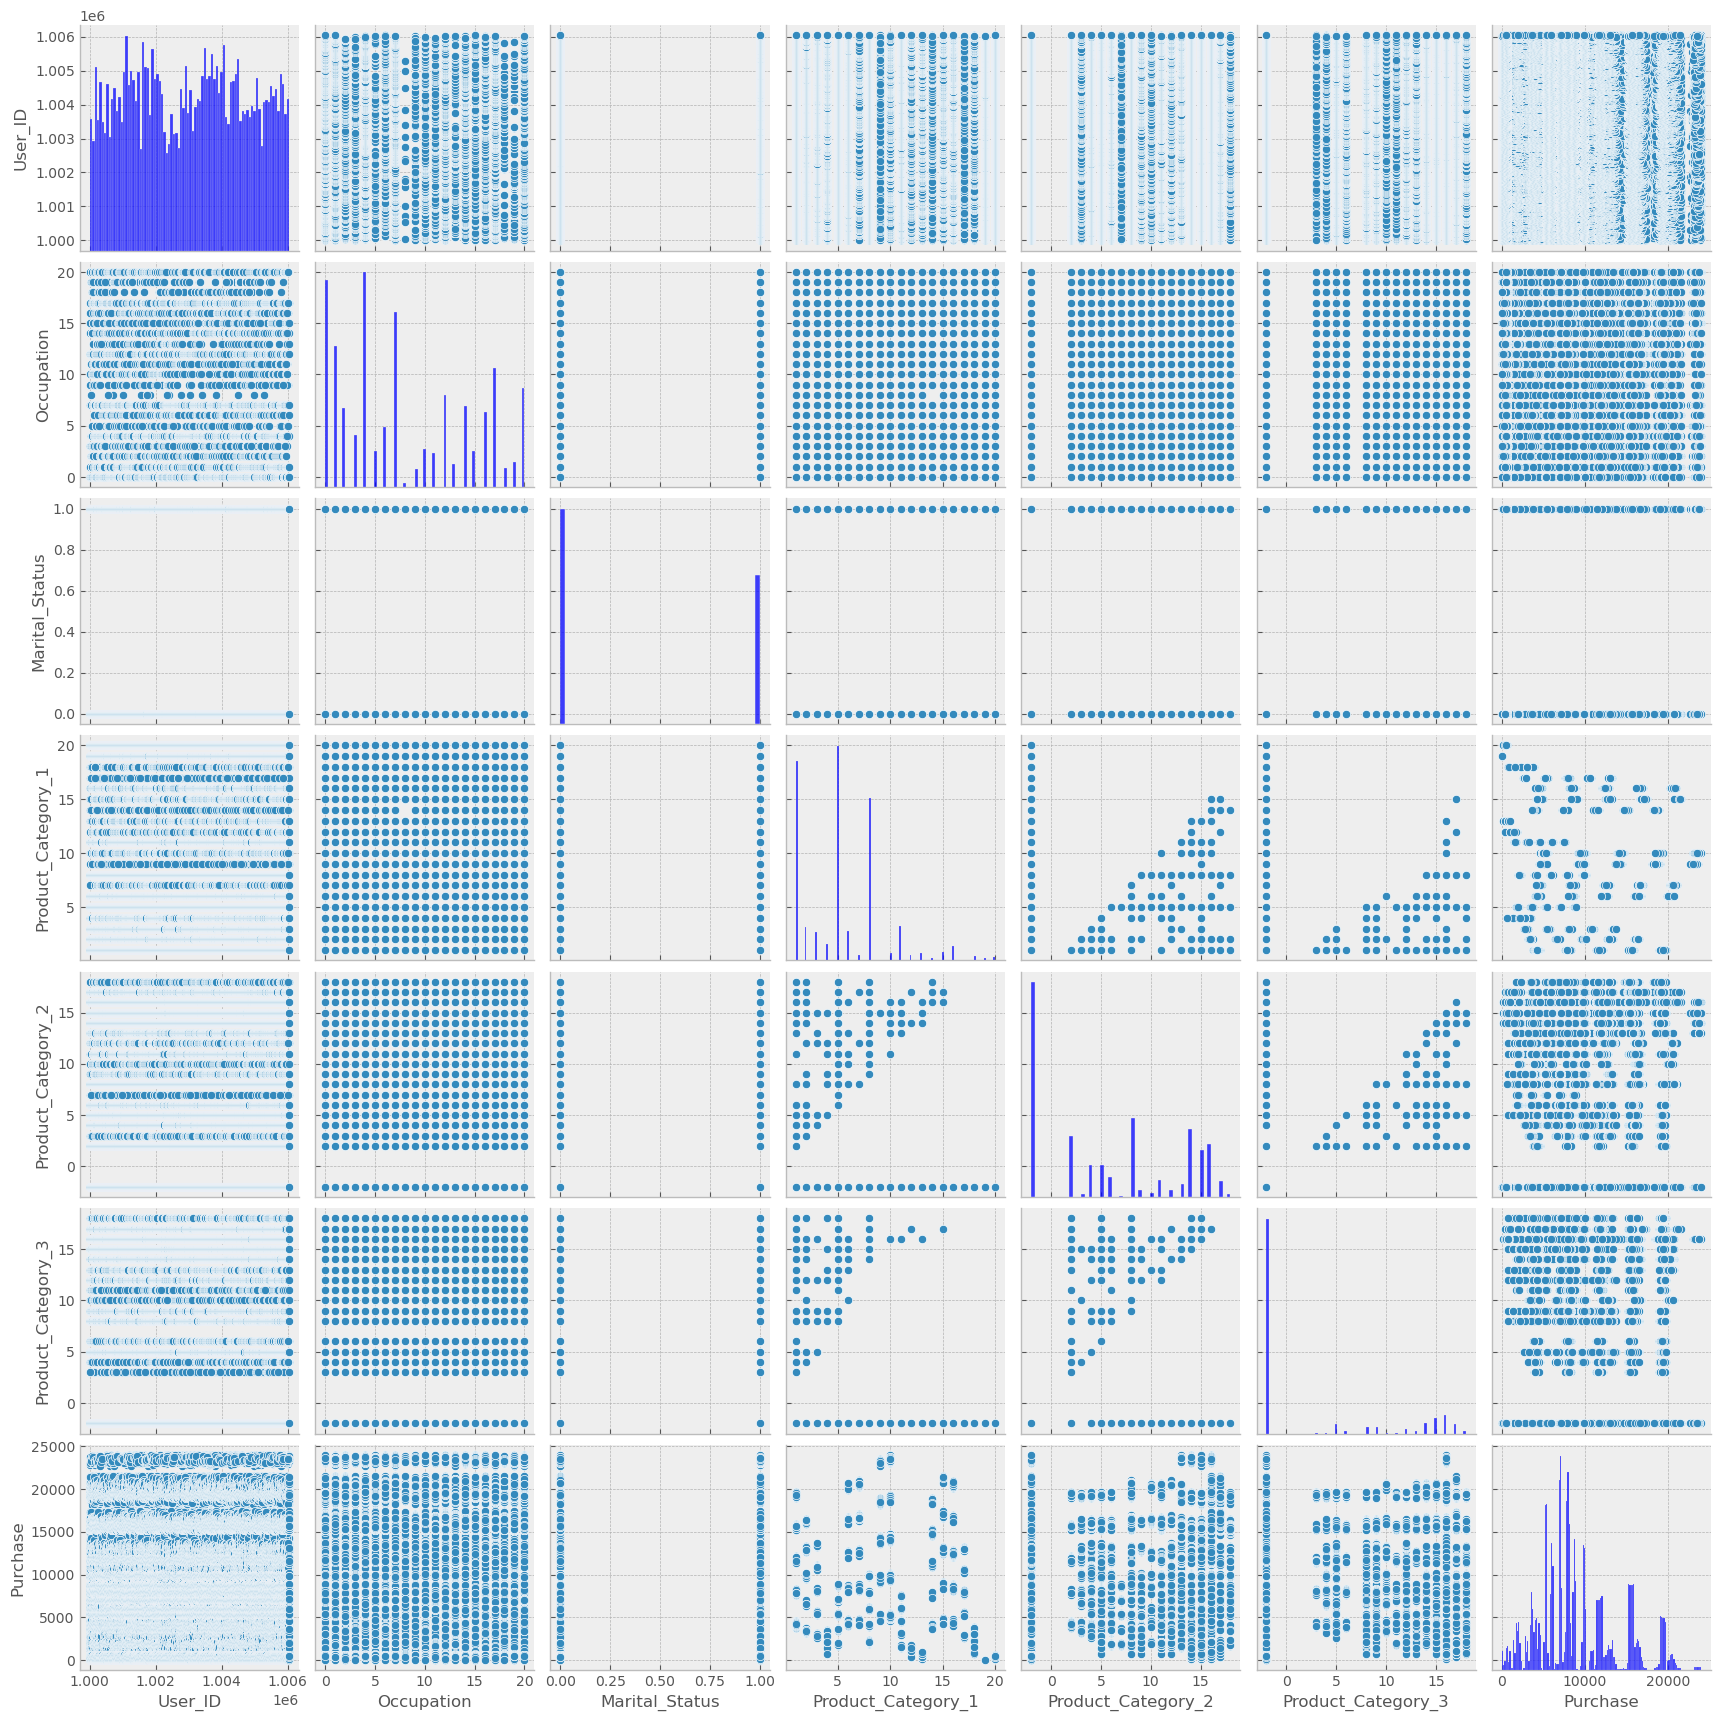

In [78]:
# Creating a Pairplot for all features
plt.style.use('bmh')
sns.pairplot(train)
plt.show()


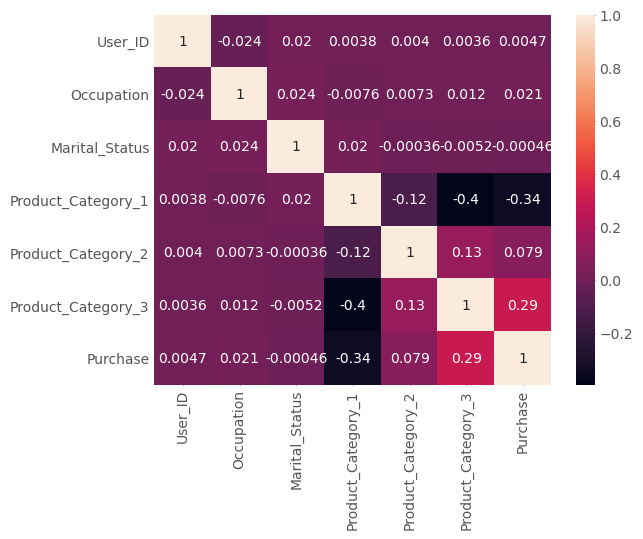

In [79]:
# Creating a heatmap of correlation matrix
sns.heatmap(train.corr(), annot = True)
plt.show()

In [80]:
#OBSERVATION:
#From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 
#'Product_Category_1' and 'Product_Category_2'.


# Step 3: Data preprocessing

In [81]:
# Checking the null values.
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Dropping irrelevant features

In [82]:
train.drop('Product_ID', axis = 1, inplace = True)
test.drop('Product_ID', axis = 1, inplace = True)

In [83]:
train.drop('User_ID', axis = 1, inplace = True)
test.drop('User_ID', axis = 1, inplace = True)

In [84]:
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,F,0-17,10,A,2,0,12,14.0,-2.0,1057
4,M,55,16,C,4,0,8,-2.0,-2.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,-2.0,-2.0,368
550064,F,26-35,1,C,3,0,20,-2.0,-2.0,371
550065,F,26-35,15,B,4,1,20,-2.0,-2.0,137
550066,F,55,1,C,2,0,20,-2.0,-2.0,365


# Feature Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder_gender = LabelEncoder()
train['Gender'] = label_encoder_gender.fit_transform(train['Gender'])


In [86]:
train['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int32

In [87]:
label_encoder_gender = LabelEncoder()
test['Gender'] = label_encoder_gender.fit_transform(test['Gender'])

In [88]:
test['Gender'] 

0         1
1         1
2         0
3         0
4         0
         ..
233594    0
233595    0
233596    0
233597    0
233598    0
Name: Gender, Length: 233599, dtype: int32

In [89]:
label_encoder_age = LabelEncoder()
train['Age'] = label_encoder_age.fit_transform(train['Age'])

In [90]:
train['Age']

0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int32

In [91]:
label_encoder_age = LabelEncoder()
test['Age'] = label_encoder_age.fit_transform(test['Age'])


In [92]:
test['Age']

0         4
1         2
2         3
3         3
4         2
         ..
233594    2
233595    2
233596    2
233597    4
233598    4
Name: Age, Length: 233599, dtype: int32

In [93]:
label_encoder_city = LabelEncoder()
train['City_Category'] = label_encoder_city.fit_transform(train['City_Category'])


In [94]:
train['City_Category']

0         0
1         0
2         0
3         0
4         2
         ..
550063    1
550064    2
550065    1
550066    2
550067    1
Name: City_Category, Length: 550068, dtype: int32

In [95]:
label_encoder_city = LabelEncoder()
test['City_Category'] = label_encoder_city.fit_transform(test['City_Category'])


In [96]:
test['City_Category']

0         1
1         2
2         1
3         1
4         2
         ..
233594    1
233595    1
233596    1
233597    2
233598    1
Name: City_Category, Length: 233599, dtype: int32

# Separating train into X and Y

In [97]:
X = train.drop("Purchase", axis = 1)
Y = train["Purchase"]

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 9)
X_test shape: (110014, 9)
Y_train shape: (440054,)
Y_test shape: (110014,)


In [99]:
test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,NaN
1,1,2,17,2,0,0,3,5.0,NaN
2,0,3,1,1,4+,1,5,14.0,NaN
3,0,3,1,1,4+,1,4,9.0,NaN
4,0,2,1,2,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4+,1,8,NaN,NaN
233595,0,2,15,1,4+,1,5,8.0,NaN
233596,0,2,15,1,4+,1,1,5.0,12.0
233597,0,4,1,2,4+,0,10,16.0,NaN


In [100]:
test.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [101]:
cols=['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in cols:
    test[col]=le.fit_transform(test[col])
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,NaN
1,1,2,17,2,0,0,3,5.0,NaN
2,0,3,1,1,4,1,5,14.0,NaN
3,0,3,1,1,4,1,4,9.0,NaN
4,0,2,1,2,1,0,4,5.0,12.0


In [102]:
test['Product_Category_2']=test['Product_Category_2'].fillna(-2.0).astype('float32')
test['Product_Category_3']=test['Product_Category_3'].fillna(-2.0).astype('float32')

In [103]:
test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,-2.0
1,1,2,17,2,0,0,3,5.0,-2.0
2,0,3,1,1,4,1,5,14.0,-2.0
3,0,3,1,1,4,1,4,9.0,-2.0
4,0,2,1,2,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4,1,8,-2.0,-2.0
233595,0,2,15,1,4,1,5,8.0,-2.0
233596,0,2,15,1,4,1,1,5.0,12.0
233597,0,4,1,2,4,0,10,16.0,-2.0


# Step 4: Building and Evaluating the Model : Data Modelling

# 4.1: Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Y_pred_lin_reg = lin_reg.predict(X_test)



In [105]:
print("\nOrginial Purchase(in dollars) data:",Y_test)
predictions=Y_pred_lin_reg
print("\nPredicted purchases (in dollars) for new costumers:\n", predictions)


Orginial Purchase(in dollars) data: 84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
133324    19139
138718     7856
22886      4037
137110     7467
515193     8002
Name: Purchase, Length: 110014, dtype: int64

Predicted purchases (in dollars) for new costumers:
 [13225.77577183 12369.02606243  7240.78139102 ...  7561.02548017
  9048.27067645  8577.82974726]


# 4.2: KNN Regression

In [106]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Y_pred_knn = knn.predict(X_test)

In [107]:
print("\nOrginial Purchase(in dollars) data:",Y_test)
predictions=Y_pred_knn
print("\nPredicted purchases (in dollars) for new costumers:\n", predictions)


Orginial Purchase(in dollars) data: 84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
133324    19139
138718     7856
22886      4037
137110     7467
515193     8002
Name: Purchase, Length: 110014, dtype: int64

Predicted purchases (in dollars) for new costumers:
 [14823.  16112.   6385.8 ...  6401.2  5063.4  8876.8]


# 4.3: Decision Tree Regression

In [108]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, Y_train)
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Y_pred_dec = dec_tree.predict(X_test)

In [109]:
print("\nOrginial Purchase(in dollars) data:",Y_test)
predictions=Y_pred_dec
print("Predicted purchases (in dollars) for new costumers:\n", predictions)


Orginial Purchase(in dollars) data: 84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
133324    19139
138718     7856
22886      4037
137110     7467
515193     8002
Name: Purchase, Length: 110014, dtype: int64
Predicted purchases (in dollars) for new costumers:
 [15790.          8300.          7814.         ...  6966.64285714
  3176.5         9503.53333333]


# 4.4: Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()
ran_for.fit(X_train, Y_train)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Y_pred_ran_for = ran_for.predict(X_test)

In [111]:
print("\nOrginial Purchase(in dollars) data:",Y_test)
predictions=Y_pred_ran_for
print("Predicted purchases (in dollars) for new costumers:\n", predictions)


Orginial Purchase(in dollars) data: 84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
133324    19139
138718     7856
22886      4037
137110     7467
515193     8002
Name: Purchase, Length: 110014, dtype: int64
Predicted purchases (in dollars) for new costumers:
 [13321.14133333 13546.97429126  6793.51911189 ...  7001.89935523
  3665.0825      9293.26281876]


# Accuracy Score

In [112]:
lr = LinearRegression()
knn=KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()


In [113]:
fit1 = lr.fit(X_train,Y_train) #Here we fit training data to linear regressor
fit2 = dtr.fit(X_train,Y_train) #Here we fit training data to Decision Tree Regressor
fit3 = knn.fit(X_train,Y_train) #Here we fit training data to k th nearest neighbourhood.
fit4 = rfr.fit(X_train,Y_train) #Here we fit training data to Random Forest Regressor

In [114]:
print("Accuracy Score of Linear regression on train set",fit1.score(X_train,Y_train)*100)
print("Accuracy Score of Decision Tree on train set",fit2.score(X_train,Y_train)*100)
print("Accuracy Score of KNN train set",fit3.score(X_train,Y_train)*100)
print("Accuracy Score of Random Forests on train set",fit4.score(X_train,Y_train)*100)

Accuracy Score of Linear regression on train set 15.365157053661715
Accuracy Score of Decision Tree on train set 80.28941225575663
Accuracy Score of KNN train set 69.47672685989116
Accuracy Score of Random Forests on train set 79.19117346484927


In [115]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,Y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,Y_test)*100)
print("Accuracy Score of KNN test set",fit3.score(X_test,Y_test)*100)
print("Accuracy Score of Random Forests on test set",fit4.score(X_test,Y_test)*100)

Accuracy Score of Linear regression on test set 15.214968092902703
Accuracy Score of Decision Tree on test set 55.275188142964474
Accuracy Score of KNN test set 58.353121767959614
Accuracy Score of Random Forests on test set 62.73736907478167


In [116]:
#FROM HERE WE GOT THE IDEA THAT RANDOM FOREST IS MORE IS MORE ACCURATE.

# Step 5: Model Evaluation

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [118]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4615.543270660222
R2 score: 0.15214968092902703


In [119]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print("R2 score:", r2_score(Y_test, Y_pred_knn))


KNN regression: 
RMSE: 3234.8523252267714
R2 score: 0.5835312176795961


In [120]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print("R2 score:", r2_score(Y_test, Y_pred_dec))


Decision tree regression: 
RMSE: 3355.841634204652
R2 score: 0.5517952550468264


In [121]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 3060.91490582491
R2 score: 0.6271140268342064


In [122]:
#Conclusion:
#In this project, we tried to build a model using various algorithms such as Linear regression, KNN regression, 
#Decision tree regression, Random forest  to get the best possible prediction.

In [123]:
#Conclusion
#Machine learning can be used for a variety of tasks. In this article, we used a machine learning algorithm to predict the 
#amount that a customer is likely to spend on Black Friday.
#We also performed exploratory data analysis to find interesting trends from the dataset. 

In [124]:
#Lower values of RMSE in Decision tree regression 
#THEREFORE Random Forest regression IS THE BEST MODEL FOR PREDICTING THE PURCHASE.
#Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern.

In [125]:
predictions=Y_pred_ran_for
print("Predicted purchases (in dollars) for new costumers:\n", predictions)

Predicted purchases (in dollars) for new costumers:
 [13321.14133333 13546.97429126  6793.51911189 ...  7001.89935523
  3665.0825      9293.26281876]


In [126]:
predictions.shape

(110014,)

In [127]:
test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,-2.0
1,1,2,17,2,0,0,3,5.0,-2.0
2,0,3,1,1,4,1,5,14.0,-2.0
3,0,3,1,1,4,1,4,9.0,-2.0
4,0,2,1,2,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4,1,8,-2.0,-2.0
233595,0,2,15,1,4,1,5,8.0,-2.0
233596,0,2,15,1,4,1,1,5.0,12.0
233597,0,4,1,2,4,0,10,16.0,-2.0


In [128]:
result=rfr.predict(test)

In [129]:
submission=pd.DataFrame()
submission['User_ID']=df2['User_ID']
submission['Product_ID']=df2['Product_ID']
submission['Purchase']=result

In [130]:
submission.to_csv(r"submission.csv",index=False)

In [131]:
sub=pd.read_csv(r'submission.csv')
sub

,User_ID,Product_ID,Purchase
0,1000004,P00128942,17411.748333
1,1000009,P00113442,10754.774167
2,1000010,P00288442,8320.342945
3,1000010,P00145342,2237.694000
4,1000011,P00053842,2992.872810
...,...,...,...
233594,1006036,P00118942,6749.496273
233595,1006036,P00254642,5862.768772
233596,1006036,P00031842,13804.981310
233597,1006037,P00124742,22329.515000


In [132]:
# RESULT: RANDOM FOREST MODEL IS THE BEST MODEL FOR PREDICTING THE PURCHASE AMOUNT IN BLACK FRIDAY SALES WITH MORE
#         ACCURACY.